## BFS: finds a path in a directed graph


### Algorithm Description
BFS to find a path between two points in a directed graph

In [300]:

import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import combinations
import random
import math
import heapq
## make the limit of animation size large
plt.rcParams['animation.embed_limit'] = 50

## Distance function

In [301]:
def dist(x,y):
    return math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

## Set Distance

In [302]:
def set_dist(X,Y):
    ans=float('inf')
    for x in X:
        for y in Y:
            ans=min(ans,dist(x,y))
    return ans

## Make instances


### Grid directed graph with some edges removed and the natural distance

In [303]:
def make_grid_instance(m:int,n:int,p:float):
    """
    Takes two integers, the dimensions of the grid and a probability p that each edge is included
    """
    nodes=[]
    edges=[]
    for i in range(m):
        for j in range(n):
            if np.random.uniform()<p:
                nodes.append((i,j))
    for u,v in combinations(nodes,2):
        if dist(u,v)==1:
            edges.append((u,v))
    G=nx.DiGraph(edges)
        
    pos={ place:place for place in list(G.nodes()) }
    ans={"pos":pos,"graph":G}
    return ans




### Random instance
Directed graph made from random points in the plane

In [304]:
def make_random_instance(m:int=200,min_dist:float=0.2,moat=0.1):
    """
    Generates a set of at most m points in the square (0,1)x(0,1) at distance at 
    least moat and joins them if their distance is less than min_dist
    """
    nodes=[]
    edges=[]
    for i in range(m):
        point=(np.random.uniform(),np.random.uniform())
        if set_dist([point],nodes)>moat:
            nodes.append(point)
    for p,q in combinations(nodes,2):
        if dist(p,q)<min_dist:
            edges.append((p,q))
    G=nx.DiGraph(edges)
    
    pos={ place:place for place in list(G.nodes()) }
    ans={"pos":pos,"graph":G}
    return ans

### BFS Explore the graph

In [306]:
def path_finder(Graph,start):
    """
    Takes a directed graph and a starting node. Returns a dictionary with keys:
    "level": a list of sets, the new nodes that can be visited on each step
    "predecesor": A dictionary that assigns the predecesor to each visited node
    "visited": The list of visited nodes 
    """
    level=[{start}]
    visited={start}
    next_level={start}
    predecesor=dict()
    predecesor[start]=None
    while next_level:
        level.append(next_level)
        visited=visited.union(next_level)
        new=set()
        for node in next_level:
            new_neighbors={vertex for vertex in Graph.successors(node) if vertex not in visited}
            visited=visited.union(new_neighbors)
            for vertex in new_neighbors:
                predecesor[vertex]=node
            new=new.union(new_neighbors)
        next_level=new
    ans=dict()
    ans["level"]=level
    ans["predecesor"]=predecesor
    ans["visited"]=visited
    return ans



### Shortest Path

In [164]:

def shortest_path(predecessors, start, end):
    """
    Reconstruct the shortest path from the predecessors.

    Parameters:
    - predecessors: a dictionary with the preceding node in the shortest path
    - start: the starting node
    - end: the ending node

    Returns:
    - path: list of nodes representing the shortest path from start to end
    """
    path = [end]
    while path[-1] != start:
        path.append(predecessors[path[-1]])
    path.reverse()
    return path

## Frame Maker
Generates a list of pairs of dictionaries with the colors of nodes and edges for each frame

In [307]:
def make_frames_path_finder(G):#Takes a networkz graph G,and the starting and ending nodes
    """
    Generates a list of pairs of dictionaries with the colors of nodes and edges for each frame
    """
    start=list(G.nodes)[0]
    ans=path_finder(G,start)
    predecessors=ans["predecesor"]
    levels=ans["level"]
    
    end=random.choice(list(levels[-1]))
    
    path = shortest_path(predecessors, start,end)
    n=len(path)
    k=len(levels)+1
    nodes_color_dict={node:"black" for node in list(G.nodes())}
    nodes_color_dict[start]="deeppink"
    nodes_color_dict[end]="palegreen"
    
    edges_color_dict={edge:"black" for edge in list(G.edges())}
    frames=[(nodes_color_dict.copy(),edges_color_dict.copy())]
    for level in levels[2:]:
        for node in level:
            nodes_color_dict[node]="deepskyblue"
        frames.append((nodes_color_dict.copy(),edges_color_dict.copy()))

    for j in range(len(path)-1):
        nodes_color_dict[path[j+1]]="deeppink"
        if (path[j],path[j+1]) in list(G.edges()):
            a,b=path[j],path[j+1]## Make sure the nodes for an edge appear in the right order
        else:
            a,b=path[j+1],path[j]
        edges_color_dict[(a,b)]="deeppink"
        frames.append((nodes_color_dict.copy(),edges_color_dict.copy()))


    return start,end,frames

## Animate Path Finder

In [308]:
def animate_path_finder(Graph,pos):
    """
    Takes a networkx graph object, the sarting nodes, ending not and the positions dictionary
    """
    

    G=Graph.copy()
    start,end,frames=make_frames_path_finder(G)
    #frames=fleury(G)
    fig, ax = plt.subplots()
     # format figure
    fig.set_facecolor('cornsilk')
    ax.set_facecolor('cornsilk')
     # List of points
            
    
    
    def update(frame):
        ax.clear()
        node_size={node:80 for node in list(G.nodes())}
        for node in {start,end}:
            node_size[node]=200
        sizes=[node_size[node] for node in list(G.nodes())]

        ax.set_title("Path Finder Algorithm",color="black",fontsize=18)
        nodes=list(G.nodes())
        a=min([node[0] for node in nodes])
        b=max([node[0] for node in nodes])
        c=min([node[1] for node in nodes])
        d=max([node[1] for node in nodes])
        margin=(b-a)/30

        ax.set_xlim(a-margin,b+margin)   # Setting x-axis limits
        ax.set_ylim(c-margin,d+margin)   # Setting x-axis limits    
        node_colors=[frame[0][node] for node in list(G.nodes())]
        edge_colors=[frame[1][edge] for edge in list(G.edges())]
        nx.draw(G, pos=pos, ax=ax,edge_color=edge_colors,node_color=node_colors,width=2,node_size=sizes)
       
        

    ani = FuncAnimation(fig, update, frames=frames, repeat=True)

    # Convert the animation to a JSHTML representation
    ani_jshtml = ani.to_jshtml()
    #print(frames)
    # Display the animation
    return(HTML(ani_jshtml))

## Animate random instance

In [327]:
ans=make_random_instance(2000,0.1,0.05)
G=ans["graph"]
pos=ans["pos"]

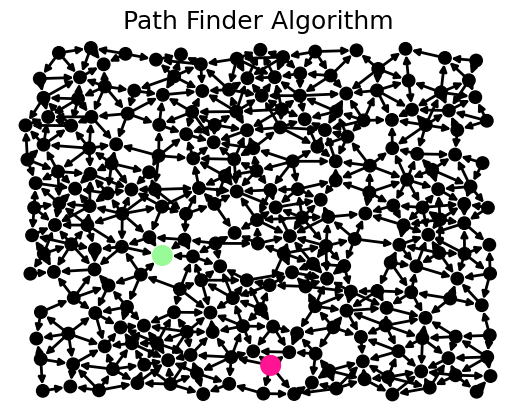

In [328]:
animate_path_finder(G,pos)

## Animage Grid Instance

In [323]:
ans=make_grid_instance(16,16,0.8)
G=ans["graph"]
pos=ans["pos"]

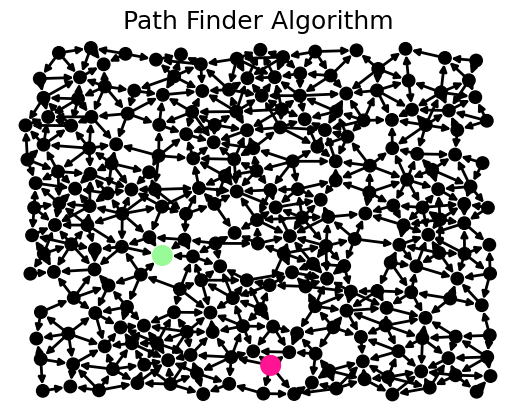

In [329]:
animate_path_finder(G,pos)